In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import time
from PIL import Image

In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
path_to_read = 'interpolate_data_low_quality/'
files = []

for r, d, f in os.walk(path_to_read):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))
files.sort()
np_files = np.asarray(files)

In [4]:
##VERIFICADOR DE TRANSIENTES SEM AS 4 CURVAS
#temp = 'SN000017'
#count = 0
#for f in np_files:
#    if (count == 4):
#        temp = f[29:37]
#        count = 0
#    if ((temp == f[29:37]) & (count < 4)):
#        count += 1
#    elif ((temp != f[29:37]) & (count < 4)):
#        print(f)

In [5]:
#set(types) -> {'IIL', 'IIP', 'II_', 'IIn', 'Ia_', 'Ib_', 'Ibc', 'Ic_'}
conversion = {'IIL' : 5, 'IIP' : 6, 'II_' : 4, 'IIn' : 7, 'Ia_' : 0, 'Ib_' : 1, 'Ibc' : 2, 'Ic_' : 3}

In [6]:
np_grouped = np_files.reshape(round(np_files.shape[0]/4), 4)
class_id = []
for g in np_grouped:
    class_id = class_id + [[g[0][29:37], g[0][38:41]]] 
types = []
for ids in class_id:
    types = types + [conversion[ids[1]]]
set(types)

{0, 1, 2, 3, 4, 5, 6, 7}

In [7]:
astr_objs = []
for i in range(len(np_grouped)):
    astr_objs = astr_objs + [class_id[i]]
    for file in np_grouped[i]:
        img = Image.open(file).convert('L')
        arr = np.array(img)
        astr_objs[-1] = astr_objs[-1] + [arr[5:35,10:56]]
len(astr_objs)


21317

In [8]:
##for ims in astr_objs[0][2:]:
##    print(len(ims[0]))
#
#teste = astr_objs[0][2]
#teste2 = teste[5:35,10:56]
#teste2.shape
#len(teste2[1])

In [9]:
labels = []
images = []
ids = []
for o in astr_objs:
    labels.append((conversion[o[1]])) #converting here to numbers to assure label in training
    images.append(o[2:])
    ids.append(o[0])
labels = np.asarray(labels)
images = np.asarray(images)
ids = np.asarray(ids)

train_n = 18000

train_labels = labels[0:train_n]
test_labels = labels[train_n:]

train_images = images[0:train_n]
test_images = images[train_n:]

train_ids = ids[0:train_n]
test_ids = ids[train_n:]


In [10]:
print(ids.shape, labels.shape, images.shape)

(21317,) (21317,) (21317, 4, 30, 46)


In [11]:
train_images.shape

(18000, 4, 30, 46)

In [12]:
train_images = np.around(train_images/255, decimals = 2)
test_images = np.around(test_images/255, decimals = 2)

# Here starts the training

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4, 30, 46)), #aqui mudar o novo shape () 64x40 iu 46x30, x4 talvez 
    #Transform the 2d array into a 1d with mxn 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.softmax) #exit layer, change to the number of class we have ()
])


Instructions for updating:
Colocations handled automatically by placer.


In [14]:
img_rows, img_cols = 30, 46
input_shape = (4, img_rows, img_cols)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [15]:
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#
#cnn3 = Sequential()
#cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#cnn3.add(MaxPooling2D((2, 2)))
#cnn3.add(Dropout(0.25))
#
#cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn3.add(MaxPooling2D(pool_size=(2, 2)))
#cnn3.add(Dropout(0.25))
#
#cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#cnn3.add(Dropout(0.4))
#
#cnn3.add(Flatten())
#
#cnn3.add(Dense(128, activation='relu'))
#cnn3.add(Dropout(0.3))
#cnn3.add(Dense(10, activation='softmax'))
#
#cnn3.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adam(),
#              metrics=['accuracy'])

In [16]:
#cnn1.compile(optimizer='adam', 
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#cnn1.fit(train_images, train_labels, epochs=10)
#

In [19]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
18000/18000 [==============================] - 16s 899us/sample - loss: 1.3278 - acc: 0.5611
Epoch 2/10
18000/18000 [==============================] - 14s 791us/sample - loss: 1.2922 - acc: 0.5668
Epoch 3/10
18000/18000 [==============================] - 15s 822us/sample - loss: 1.2820 - acc: 0.5667
Epoch 4/10
18000/18000 [==============================] - 15s 850us/sample - loss: 1.2397 - acc: 0.5847
Epoch 5/10
18000/18000 [==============================] - 16s 867us/sample - loss: 1.1277 - acc: 0.6413
Epoch 6/10
18000/18000 [==============================] - 16s 890us/sample - loss: 1.0640 - acc: 0.6635
Epoch 7/10
18000/18000 [==============================] - 18s 981us/sample - loss: 1.0538 - acc: 0.6688
Epoch 8/10
18000/18000 [==============================] - 27s 1ms/sample - loss: 1.0255 - acc: 0.6813
Epoch 9/10
18000/18000 [==============================] - 27s 1ms/sample - loss: 1.0172 - acc: 0.6798
Epoch 10/10
18000/18000 [==============================] - 24s 1ms/s

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

3317/3317 [==============================] - 1s 350us/sample - loss: 1.0232 - acc: 0.6666
Test accuracy: 0.6665662


In [21]:
predictions = model.predict(test_images)

In [22]:
print(predictions[0], '\n',
      'Predicted: ', np.argmax(predictions[0]), ' True one: ', test_labels[0])


[0.044048   0.01934973 0.00480296 0.03077574 0.8325867  0.00511907
 0.01112222 0.05219564] 
 Predicted:  4  True one:  4


In [23]:
##TEMPLATE DE COMO PEGAR O ARQUIVO
#import numpy as np
#from PIL import Image
#
#img = Image.open('SN000017_II_desg.png').convert('L')
#arr = np.array(img)
#arr = arr[5:35,10:56]
## record the original shape
#shape = arr.shape
#
## make a 1-dimensional view of arr
#flat_arr = arr.ravel()
#
## convert it to a matrix
#vector = np.matrix(flat_arr)
#
## do something to the vector
#vector[:,::10] = 128
#
## reform a numpy array of the original shape
#arr2 = np.asarray(vector).reshape(shape)
#
## make a PIL image
#img2 = Image.fromarray(arr2, 'L')
#img2.show()

In [24]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [39]:
from sklearn.metrics import confusion_matrix
y_true = test_labels
y_pred = []
for i in predictions:
    y_pred.append(np.argmax(i))

confusion_matrix(y_true, y_pred)

array([[ 445,    0,    0,    0,  361,    0,    0,    0],
       [ 124,    0,    0,    0,  109,    0,    0,    0],
       [  21,    0,    0,    0,   23,    0,    0,    0],
       [  43,    0,    0,    0,  126,    0,    0,    0],
       [  59,    0,    0,    0, 1766,    0,    0,    0],
       [  49,    0,    0,    0,   27,    0,    0,    0],
       [   6,    0,    0,    0,   28,    0,    0,    0],
       [   7,    0,    0,    0,  123,    0,    0,    0]])

In [54]:
unique, counts = np.unique(labels, return_counts=True)

In [55]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7])

In [56]:
counts

array([ 5087,  1438,   259,  1103, 12027,   425,   189,   789])

In [48]:
conversion

{'IIL': 5,
 'IIP': 6,
 'II_': 4,
 'IIn': 7,
 'Ia_': 0,
 'Ib_': 1,
 'Ibc': 2,
 'Ic_': 3}

In [79]:
y_true.shape

(3317,)

In [82]:
y_pred = np.asarray(y_pred)

In [99]:
conversion

{'IIL': 5,
 'IIP': 6,
 'II_': 4,
 'IIn': 7,
 'Ia_': 0,
 'Ib_': 1,
 'Ibc': 2,
 'Ic_': 3}

In [97]:
class_names = ['Ia','Ib','Ibc','Ic','II','IIL','IIP','IIn',]

Confusion matrix, without normalization
Normalized confusion matrix


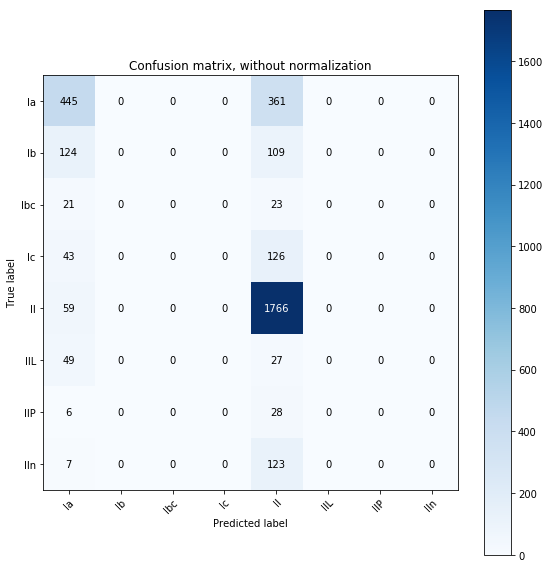

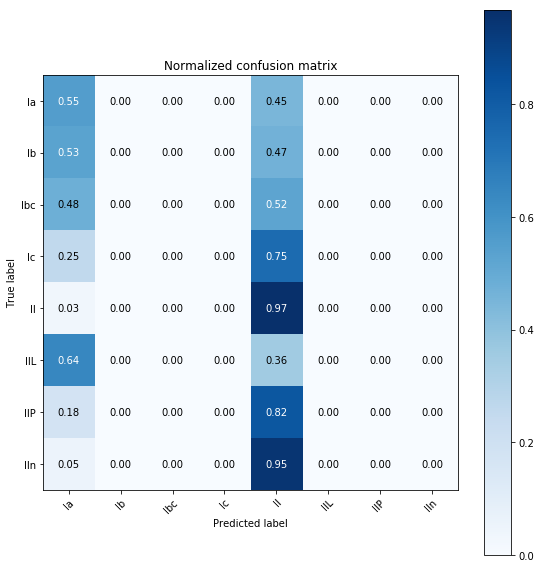

In [107]:



np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [75]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7])